In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os


In [4]:
# Load the dataset
df = pd.read_csv(r'C:\\Users\\elsay\\Downloads\\Compressed\\Superstore Sales Data Analysis\\Superstore Sales Dataset.csv')

In [5]:
# Convert 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


In [21]:
# --- Basic Sales Statistics ---
total_sales = df['Sales'].sum()
average_sales_order = df['Sales'].mean()
median_sales_order = df['Sales'].median()
sales_std_dev = df['Sales'].std()
min_sales = df['Sales'].min()
max_sales = df['Sales'].max()
# --- Print Basic Sales Statistics ---
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales per Order: ${average_sales_order:,.2f}")
print(f"Median Sales per Order: ${median_sales_order:,.2f}")
print(f"Sales Standard Deviation: ${sales_std_dev:,.2f}")
print(f"Minimum Sales per Order: ${min_sales:,.2f}")
print(f"Maximum Sales per Order: ${max_sales:,.2f}")


Total Sales: $2,261,536.78
Average Sales per Order: $230.77
Median Sales per Order: $54.49
Sales Standard Deviation: $626.65
Minimum Sales per Order: $0.44
Maximum Sales per Order: $22,638.48


+-----------------+--------+---------+---------+
| Category        |    sum |    mean |   count |
|-----------------+--------+---------+---------|
| Technology      | 827456 | 456.401 |    1813 |
| Furniture       | 728659 | 350.654 |    2078 |
| Office Supplies | 705422 | 119.381 |    5909 |
+-----------------+--------+---------+---------+


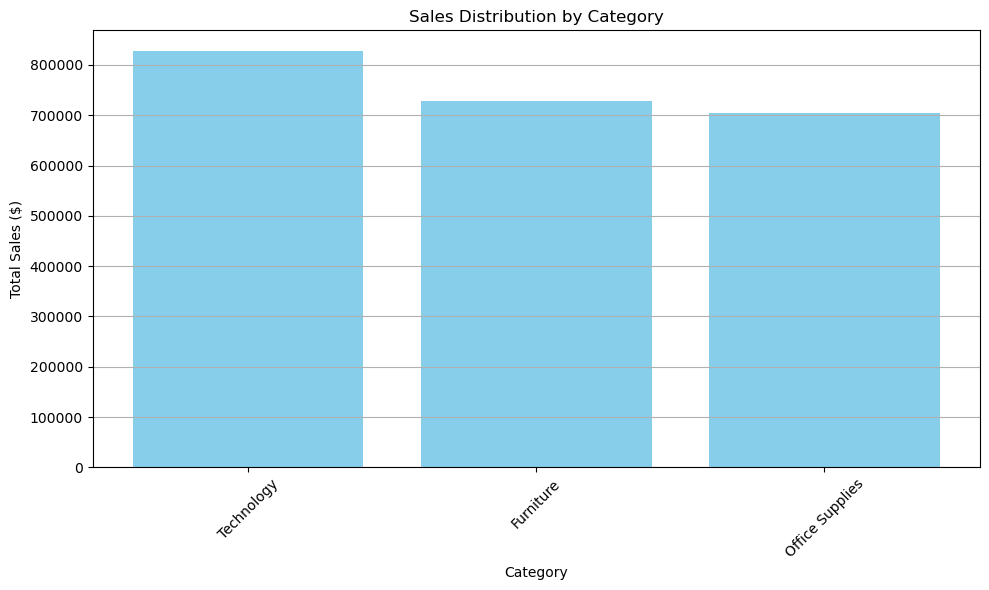

In [38]:
# --- Sales Analysis by Dimensions ---
# By Category
sales_by_category = df.groupby('Category')['Sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
print(tabulate(sales_by_category, headers='keys', tablefmt='psql'))
# --- Sales Distribution by Category ---
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category.index, sales_by_category['sum'], color='skyblue')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()  # Display the plot

+----------------+-----------+-----------+---------+
| Sub-Category   |       sum |      mean |   count |
|----------------+-----------+-----------+---------|
| Phones         | 327782    |  374.181  |     876 |
| Chairs         | 322823    |  531.833  |     607 |
| Storage        | 219343    |  263.634  |     832 |
| Tables         | 202811    |  645.894  |     314 |
| Binders        | 200029    |  134.068  |    1492 |
| Machines       | 189239    | 1645.55   |     115 |
| Accessories    | 164187    |  217.178  |     756 |
| Copiers        | 146248    | 2215.88   |      66 |
| Bookcases      | 113813    |  503.598  |     226 |
| Appliances     | 104618    |  227.927  |     459 |
| Furnishings    |  89212    |   95.8239 |     931 |
| Paper          |  76828.3  |   57.4203 |    1338 |
| Supplies       |  46420.3  |  252.284  |     184 |
| Art            |  26705.4  |   34.0196 |     785 |
| Envelopes      |  16128    |   65.0324 |     248 |
| Labels         |  12347.7  |   34.5875 |    

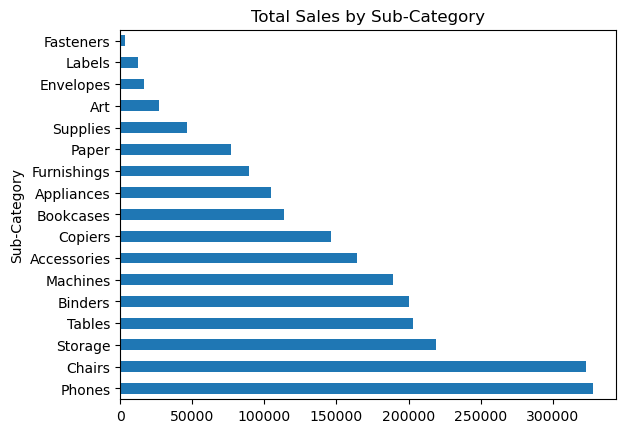

In [34]:
# By Sub-Category
sales_by_sub_category = df.groupby('Sub-Category')['Sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
print(tabulate(sales_by_sub_category, headers='keys', tablefmt='psql'))
# --- 3. Sales by Sub-Category ---
sales_by_sub_category = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8)) # Adjust size for more sub-categories
sns.barplot(y=sales_by_sub_category.index, x=sales_by_sub_category.values, orient='h')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.close()
print(sales_by_sub_category.plot(kind='barh', title='Total Sales by Sub-Category'))


+----------+--------+---------+---------+
| Region   |    sum |    mean |   count |
|----------+--------+---------+---------|
| West     | 710220 | 226.185 |    3140 |
| East     | 669519 | 240.402 |    2785 |
| Central  | 492647 | 216.358 |    2277 |
| South    | 389151 | 243.524 |    1598 |
+----------+--------+---------+---------+
Axes(0.125,0.11;0.775x0.77)


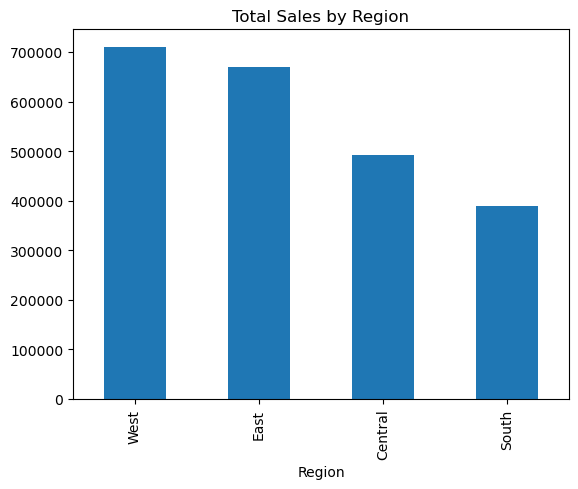

In [35]:
# By Region
sales_by_region = df.groupby('Region')['Sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
print(tabulate(sales_by_region, headers='keys', tablefmt='psql'))

# --- 4. Sales by Region ---
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.close()
print(sales_by_region.plot(kind='bar', title='Total Sales by Region'))

+--------------+----------+---------+---------+
| State        |      sum |    mean |   count |
|--------------+----------+---------+---------|
| California   | 446306   | 229.346 |    1946 |
| New York     | 306361   | 279.272 |    1097 |
| Texas        | 168573   | 173.25  |     973 |
| Washington   | 135207   | 268.268 |     504 |
| Pennsylvania | 116277   | 199.788 |     582 |
| Florida      |  88436.5 | 237.095 |     373 |
| Illinois     |  79236.5 | 164.051 |     483 |
| Michigan     |  76136.1 | 300.933 |     253 |
| Ohio         |  75130.4 | 165.485 |     454 |
| Virginia     |  70636.7 | 315.343 |     224 |
+--------------+----------+---------+---------+
Axes(0.125,0.11;0.775x0.77)


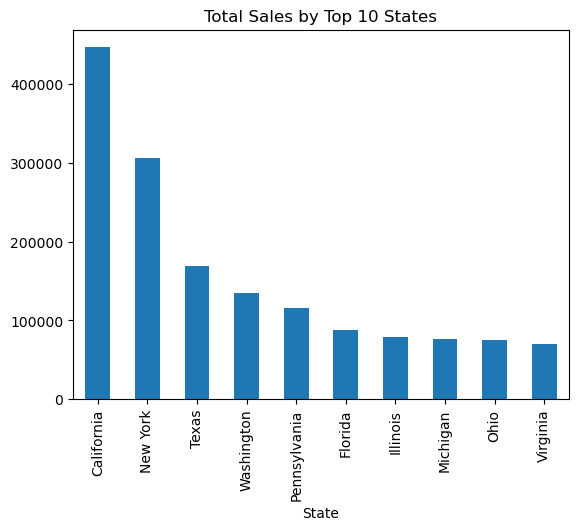

In [ ]:
# By State (Top 10)
sales_by_state = df.groupby('State')['Sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
top_10_states_sales = sales_by_state.head(10)
print(tabulate(top_10_states_sales, headers='keys', tablefmt='psql'))
#  Sales by Top 10 States ---
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
top_10_states_sales = sales_by_state.head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_states_sales.index, y=top_10_states_sales.values)
plt.title('Total Sales by Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.close()
print(top_10_states_sales.plot(kind='bar', title='Total Sales by Top 10 States'))


+-------------+------------------+---------+---------+
| Segment     |              sum |    mean |   count |
|-------------+------------------+---------+---------|
| Consumer    |      1.14806e+06 | 225.066 |    5101 |
| Corporate   | 688494           | 233.151 |    2953 |
| Home Office | 424982           | 243.403 |    1746 |
+-------------+------------------+---------+---------+
Axes(0.22375,0.11;0.5775x0.77)


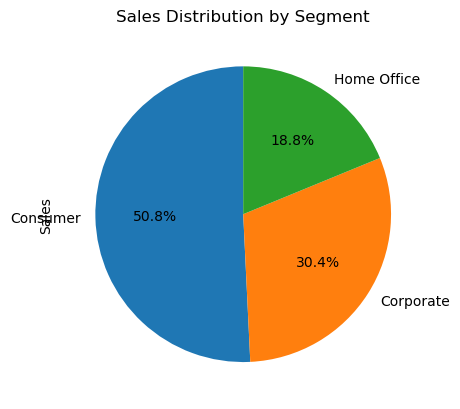

In [37]:
# By Segment
sales_by_segment = df.groupby('Segment')['Sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
print(tabulate(sales_by_segment, headers='keys', tablefmt='psql'))
#  Sales by Segment ---
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure()
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Segment')
plt.ylabel('') # Hide y-label for pie chart
plt.tight_layout()
plt.close()
print(sales_by_segment.plot(kind='pie', title='Sales Distribution by Segment', autopct='%1.1f%%', startangle=90))



C:\Users\elsay\AppData\Local\Temp\ipykernel_13008\4157236771.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  period_sales = df_time.resample('M')['Sales'].sum()


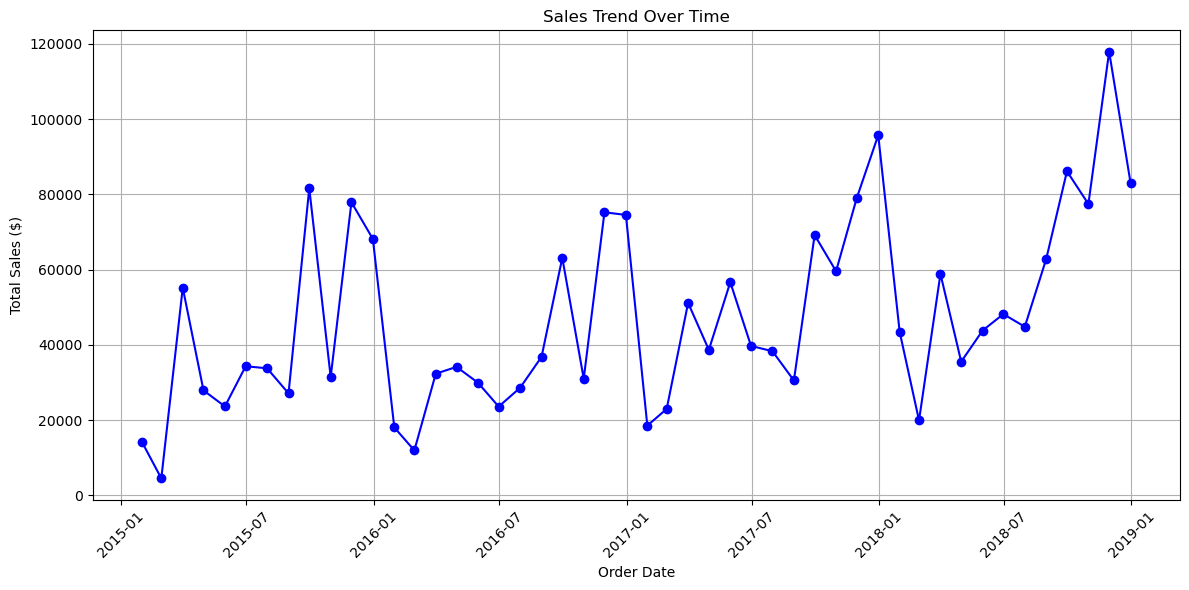

In [30]:
# --- Sales Trend Over Time ---
# Set 'Order Date' as index for time series analysis
df_time = df.set_index('Order Date')
period_sales = df_time.resample('M')['Sales'].sum()
# Plotting the sales trend over time
plt.figure(figsize=(12, 6)) 
plt.plot(period_sales.index, period_sales.values, marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time')  
plt.xlabel('Order Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()  # Display the plot


In [32]:
# Monthly Sales Trend
monthly_sales = df_time['Sales'].resample('M').sum()
print(tabulate(monthly_sales.reset_index(), headers=['Order Date', 'Total Sales'], tablefmt='psql'))


+----+---------------------+---------------+
|    | Order Date          |   Total Sales |
|----+---------------------+---------------|
|  0 | 2015-01-31 00:00:00 |      14205.7  |
|  1 | 2015-02-28 00:00:00 |       4519.89 |
|  2 | 2015-03-31 00:00:00 |      55205.8  |
|  3 | 2015-04-30 00:00:00 |      27906.9  |
|  4 | 2015-05-31 00:00:00 |      23644.3  |
|  5 | 2015-06-30 00:00:00 |      34322.9  |
|  6 | 2015-07-31 00:00:00 |      33781.5  |
|  7 | 2015-08-31 00:00:00 |      27117.5  |
|  8 | 2015-09-30 00:00:00 |      81623.5  |
|  9 | 2015-10-31 00:00:00 |      31453.4  |
| 10 | 2015-11-30 00:00:00 |      77907.7  |
| 11 | 2015-12-31 00:00:00 |      68167.1  |
| 12 | 2016-01-31 00:00:00 |      18067    |
| 13 | 2016-02-29 00:00:00 |      11951.4  |
| 14 | 2016-03-31 00:00:00 |      32339.3  |
| 15 | 2016-04-30 00:00:00 |      34154.5  |
| 16 | 2016-05-31 00:00:00 |      29959.5  |
| 17 | 2016-06-30 00:00:00 |      23599.4  |
| 18 | 2016-07-31 00:00:00 |      28608.3  |
| 19 | 201

C:\Users\elsay\AppData\Local\Temp\ipykernel_13008\3523769343.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time['Sales'].resample('M').sum()


C:\Users\elsay\AppData\Local\Temp\ipykernel_13008\1344348380.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df_time['Sales'].resample('Y').sum()


+----+---------------------+---------------+
|    | Year                |   Total Sales |
+====+=====================+===============+
|  0 | 2015-12-31 00:00:00 |        479856 |
+----+---------------------+---------------+
|  1 | 2016-12-31 00:00:00 |        459436 |
+----+---------------------+---------------+
|  2 | 2017-12-31 00:00:00 |        600193 |
+----+---------------------+---------------+
|  3 | 2018-12-31 00:00:00 |        722052 |
+----+---------------------+---------------+
Axes(0.125,0.11;0.775x0.77)


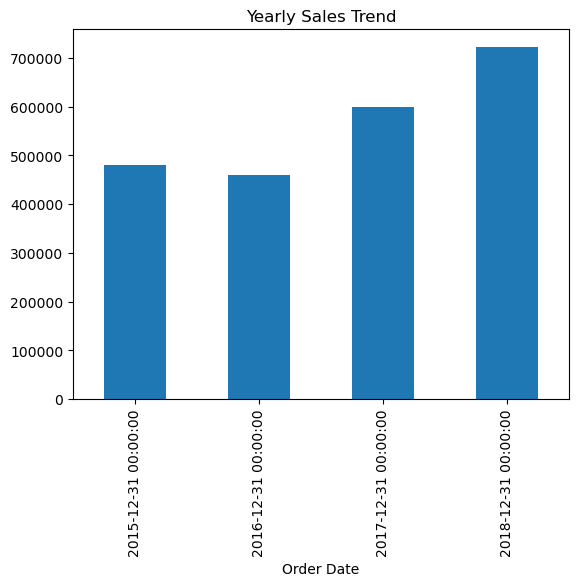

In [33]:
# Yearly Sales Trend
yearly_sales = df_time['Sales'].resample('Y').sum()
print(tabulate(yearly_sales.reset_index(), headers=['Year', 'Total Sales'], tablefmt='grid'))
# Yearly Sales
yearly_sales = df_time['Sales'].resample('YE').sum()
plt.figure()
yearly_sales.plot(kind='bar', title='Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.close()
print(yearly_sales.plot(kind='bar', title='Yearly Sales Trend'))